In [2]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 28.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633993 sha256=462cb6340fb44c995c875f508a46126666fa447638d7a96aea2be1b95ab6f655
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [20]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 796 kB 37.7 MB/s 
     |████████████████████████████████| 136 kB 73.9 MB/s 
     |████████████████████████████████| 529 kB 69.1 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=48027558e80b3b22ab8afbe09ffed63c04de51230cfe1cd55aba997b113829be
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire


In [3]:
from surprise import Dataset
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import SVD, KNNBasic, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
import seaborn as sns, numpy as np

In [4]:
data = Dataset.load_builtin("ml-100k", prompt=False)

Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
df = pd.DataFrame(data.raw_ratings, columns=["userId", "movieId", "rating", "timestamp"])

In [6]:
df.head(10)

,userId,movieId,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
5,298,474,4.0,884182806
6,115,265,2.0,881171488
7,253,465,5.0,891628467
8,305,451,3.0,886324817
9,6,86,3.0,883603013


*  Колонка **userId** - идентификаторы пользователей сайта movielens;
*  Колонка **movieId** - идентификаторы фильмов;
*  Колонка **rating** - оценки фильмов пользователями по шкале от 1 до 5;
*  Колонка **timestamp** - это время оценки фильма пользователем. Данный формат представления времени показывает, сколько секунд прошло с 1 января 1970 года.

In [7]:
df.apply("nunique")

userId         943
movieId       1682
rating           5
timestamp    49282
dtype: int64

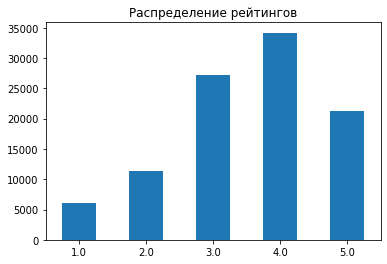

In [8]:
df["rating"].value_counts().sort_index().plot.bar(title="Распределение рейтингов", rot=0);

In [9]:
print('Сколько оценок в среднем поставил один человек ', df.groupby('userId')['movieId'].count().mean(), 
      'какова выборочная дисперсия этой величины', df.groupby('userId')['movieId'].count().std())

Сколько оценок в среднем поставил один человек  106.04453870625663 какова выборочная дисперсия этой величины 100.93174276633498


In [10]:
print('Сколько оценок в среднем имеет один фильм ', df.groupby('movieId')['userId'].count().mean(), 
      'дисперсия ', df.groupby('movieId')['userId'].count().std())

Сколько оценок в среднем имеет один фильм  59.45303210463734 дисперсия  80.38384561004929


In [11]:
trainset, testset = train_test_split(data, test_size=0.25)

algo = SVD()
algo.fit(trainset)

In [12]:
predictions = algo.test(testset)

In [13]:
testset

[('374', '846', 2.0),
 ('406', '157', 3.0),
 ('763', '625', 4.0),
 ('668', '895', 3.0),
 ('821', '106', 2.0),
 ('41', '1039', 3.0),
 ('221', '568', 4.0),
 ('916', '195', 3.0),
 ('833', '26', 1.0),
 ('333', '315', 5.0),
 ('405', '387', 1.0),
 ('256', '381', 5.0),
 ('450', '842', 4.0),
 ('297', '273', 4.0),
 ('303', '1041', 2.0),
 ('76', '358', 2.0),
 ('380', '614', 3.0),
 ('474', '921', 3.0),
 ('921', '125', 3.0),
 ('85', '221', 2.0),
 ('405', '176', 1.0),
 ('311', '96', 5.0),
 ('151', '134', 4.0),
 ('85', '168', 4.0),
 ('567', '617', 4.0),
 ('565', '707', 5.0),
 ('653', '1012', 4.0),
 ('806', '421', 4.0),
 ('711', '966', 5.0),
 ('907', '620', 4.0),
 ('80', '215', 5.0),
 ('244', '458', 3.0),
 ('172', '425', 1.0),
 ('454', '707', 3.0),
 ('417', '325', 2.0),
 ('95', '175', 5.0),
 ('56', '219', 5.0),
 ('391', '56', 5.0),
 ('220', '306', 4.0),
 ('449', '473', 3.0),
 ('174', '100', 5.0),
 ('311', '661', 3.0),
 ('261', '322', 4.0),
 ('222', '363', 2.0),
 ('844', '1474', 4.0),
 ('747', '511', 

In [14]:
accuracy.rmse(predictions);

RMSE: 0.9361


## Кросс-валидация

In [15]:
algo = SVD()
cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9329  0.9359  0.9386  0.9340  0.9381  0.9359  0.0022  
MAE (testset)     0.7380  0.7363  0.7375  0.7369  0.7384  0.7374  0.0008  
Fit time          6.18    7.45    4.12    4.11    4.09    5.19    1.39    
Test time         0.26    0.14    0.30    0.12    0.28    0.22    0.08    


{'test_rmse': array([0.93291514, 0.93585745, 0.93864527, 0.93396932, 0.93813412]),
 'test_mae': array([0.73801715, 0.73628979, 0.73751381, 0.73691013, 0.73838361]),
 'fit_time': (6.1813201904296875,
  7.448822259902954,
  4.119810104370117,
  4.105401277542114,
  4.093205690383911),
 'test_time': (0.26274681091308594,
  0.13527274131774902,
  0.2980842590332031,
  0.11762404441833496,
  0.28316807746887207)}

In [16]:
parameters = {'n_epochs':[20,30],
              'lr_all':[0.005,0.01],
              'reg_all':[0.02,0.1]}

gs = GridSearchCV(SVD, parameters, measures=["RMSE", "MAE"], cv=5)
gs.fit(data)

In [17]:
gs.best_score

{'rmse': 0.9121939949261313, 'mae': 0.7211333402664849}

# KNN

In [18]:
parameters = {'n_epochs':[20,30],
              'lr_all':[0.005,0.01],
              'reg_all':[0.02,0.1]}

gs = GridSearchCV(KNNBasic, parameters, measures=["RMSE", "MAE"], cv=5)
gs.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [19]:
gs.best_score

{'rmse': 0.9794407335253412, 'mae': 0.7732693825957895}

# Neural Collaborative Filtering (NCF)

In [41]:
import torch
from torch.utils.data import Dataset

class MovieLensTrainDataset(Dataset):
    """MovieLens PyTorch Dataset for Training
    
    Args:
        ratings (pd.DataFrame): Dataframe containing the movie ratings
        all_movieIds (list): List containing all movieIds
    
    """

    def __init__(self, ratings, all_movieIds):
        self.users, self.items, self.labels = self.get_dataset(ratings, all_movieIds)

    def __len__(self):
        return len(self.users)
  
    def __getitem__(self, idx):
        return self.users[idx], self.items[idx], self.labels[idx]

    def get_dataset(self, ratings, all_movieIds):
        users, items, labels = [], [], []
        user_item_set = set(zip(df['userId'], df['movieId']))

        num_negatives = 4
        for u, i in user_item_set:
            users.append(u)
            items.append(i)
            labels.append(1)
            for _ in range(num_negatives):
                negative_item = np.random.choice(all_movieIds)
                while (u, negative_item) in user_item_set:
                    negative_item = np.random.choice(all_movieIds)
                users.append(u)
                items.append(negative_item)
                labels.append(0)

        return torch.tensor(users), torch.tensor(items), torch.tensor(labels)

In [42]:
import torch.nn as nn
import torch
import pytorch_lightning as pl
from torch.utils.data import DataLoader

class NCF(pl.LightningModule):
    """ Neural Collaborative Filtering (NCF)
    
        Args:
            num_users (int): Number of unique users
            num_items (int): Number of unique items
            ratings (pd.DataFrame): Dataframe containing the movie ratings for training
            all_movieIds (list): List containing all movieIds (train + test)
    """
    
    def __init__(self, num_users, num_items, ratings, all_movieIds):
        super().__init__()
        self.user_embedding = nn.Embedding(num_embeddings=num_users, embedding_dim=8)
        self.item_embedding = nn.Embedding(num_embeddings=num_items, embedding_dim=8)
        self.fc1 = nn.Linear(in_features=16, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=32)
        self.output = nn.Linear(in_features=32, out_features=1)
        self.ratings = ratings
        self.all_movieIds = all_movieIds
        
    def forward(self, user_input, item_input):
        
        # Pass through embedding layers
        user_embedded = self.user_embedding(user_input)
        item_embedded = self.item_embedding(item_input)

        # Concat the two embedding layers
        vector = torch.cat([user_embedded, item_embedded], dim=-1)

        # Pass through dense layer
        vector = nn.ReLU()(self.fc1(vector))
        vector = nn.ReLU()(self.fc2(vector))

        # Output layer
        pred = nn.Sigmoid()(self.output(vector))

        return pred
    
    def training_step(self, batch, batch_idx):
        user_input, item_input, labels = batch
        predicted_labels = self(user_input, item_input)
        loss = nn.BCELoss()(predicted_labels, labels.view(-1, 1).float())
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def train_dataloader(self):
        return DataLoader(MovieLensTrainDataset(self.ratings, self.all_movieIds),
                          batch_size=512, num_workers=4)

In [43]:
df['userId'] = df['userId'].apply(int)
df['movieId'] = df['movieId'].apply(int)

In [71]:
df['rank_latest'] = df.groupby(['userId'])['timestamp'].rank(method='first', ascending=False)

train_ratings = df[df['rank_latest'] != 1]
test_ratings = df[df['rank_latest'] == 1]

# drop columns that we no longer need
train_ratings = train_ratings[['userId', 'movieId', 'rating']]
test_ratings = test_ratings[['userId', 'movieId', 'rating']]

In [72]:
num_users = df['userId'].max()+1
num_items = df['movieId'].max()+1
all_movieIds = df['movieId'].unique()

model = NCF(num_users, num_items, train_ratings, all_movieIds)

trainer = pl.Trainer(max_epochs=5, gpus=1, logger=False)

trainer.fit(model)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:606: UserWarning: Checkpoint directory /content/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVIC

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [63]:
def MAE(predictions):
 return accuracy.mae(predictions, verbose=False)

def RMSE(predictions):
 return accuracy.rmse(predictions, verbose=False)

In [82]:
# User-item pairs for testing
test_user_item_set = set(zip(test_ratings['userId'], test_ratings['movieId']))

# Dict of all items that are interacted with by each user
user_interacted_items = df.groupby('userId')['movieId'].apply(list).to_dict()

hits = []
hits1 = []
pred_lables = []
test_lables = []
for (u,i) in test_user_item_set:
    interacted_items = user_interacted_items[u]
    not_interacted_items = set(all_movieIds) - set(interacted_items)
    selected_not_interacted = list(np.random.choice(list(not_interacted_items), 99))
    test_items = selected_not_interacted + [i]
    
    predicted_labels = np.squeeze(model(torch.tensor([u]*100), 
                                        torch.tensor(test_items)).detach().numpy())

    top10_items = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:10].tolist()]
    
    if i in top10_items:
        hits.append(1)
    else:
        hits.append(0)


    top1_item = [test_items[i] for i in np.argsort(predicted_labels)[::-1][0:1].tolist()]

    test_label = test_ratings.loc[(test_ratings['userId'] == u) 
                                  & (test_ratings['movieId'] == i)]['rating']
    pred_lables.append(top1_item)
    test_lables.append(test_label)

    if i in top1_item:
        hits1.append(1)
    else:
        hits1.append(0)
        
print("The Hit Ratio @ 10 is {:.2f}".format(np.average(hits)))
print("The Hit Ratio @ 1 is {:.2f}".format(np.average(hits1)))

The Hit Ratio @ 10 is 0.41
The Hit Ratio @ 1 is 0.09


In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#RMSE
sqrt(mean_squared_error(test_lables, pred_lables))

236.93305943948653

In [83]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_lables, pred_lables)

191.9915164369035

#Построение рекомендаций

In [86]:
params = gs.best_params['rmse']
KNNBasic_tuned = KNNBasic(n_epochs=params['n_epochs'], lr_all=params['lr_all'], reg_all=params['reg_all'])

In [87]:
KNNBasic_tuned.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [88]:
predictions = KNNBasic_tuned.test(testset)

In [89]:
df_predicted = pd.DataFrame(predictions)

users = []
top_3_recomendations = []
for user in df_predicted['uid'].unique():
    list_rec = df_predicted[df_predicted['uid'] == user].sort_values('est', ascending=False)[:3]['iid'].tolist()
    users.append(user)
    top_3_recomendations.append(list_rec)

df_recomendations = pd.DataFrame({'user': users,
                                  'recomendation': top_3_recomendations})

In [90]:
df_recomendations.head()

,user,recomendation
0,374,"[64, 172, 12]"
1,406,"[12, 127, 488]"
2,763,"[12, 515, 190]"
3,668,"[302, 257, 286]"
4,821,"[318, 174, 484]"


In [91]:
df_recomendations = df_recomendations.explode('recomendation')

In [92]:
# Сколько раз был рекомендован каждый фильм
df_movie_rec_num = df_recomendations.groupby('recomendation')['user'].count().reset_index().rename(columns={'user':'recomended_num',
                                                                                                            'recomendation':'movie_id'})
df_movie_rec_num.head(5)

,movie_id,recomended_num
0,1,18
1,10,5
2,100,52
3,1007,4
4,1012,3


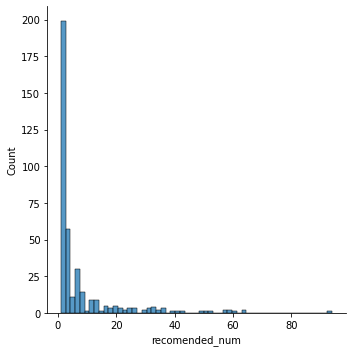

In [93]:
sns.displot(df_movie_rec_num['recomended_num']);